# Analyse und Plotting der Daten
Author: Jan Lorenzen <br>
Date: 16.11.2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rand
#from ipynb.fs.defs.Noise_reduction import noise_reduction

# Aluminium 1 Daten

In [6]:
data = pd.read_csv('../csv_Materialien/Al_1.csv', skipinitialspace=True)
data.head()

,KeV,Counts
0,-0.220531,0
1,0.485008,0
2,1.190547,0
3,1.896086,0
4,2.601624,0


In [7]:
data.describe()

,KeV,Counts
count,16384.000000,16384.000000
mean,5777.152658,3961.187500
std,3335.281937,12135.928646
min,-0.220531,0.000000
25%,2889.106347,58.000000
50%,5777.664922,858.000000
75%,8665.455194,2665.000000
max,11552.477164,226078.000000


In [5]:
data['Counts(log)'] = np.log(data['Counts']+1)

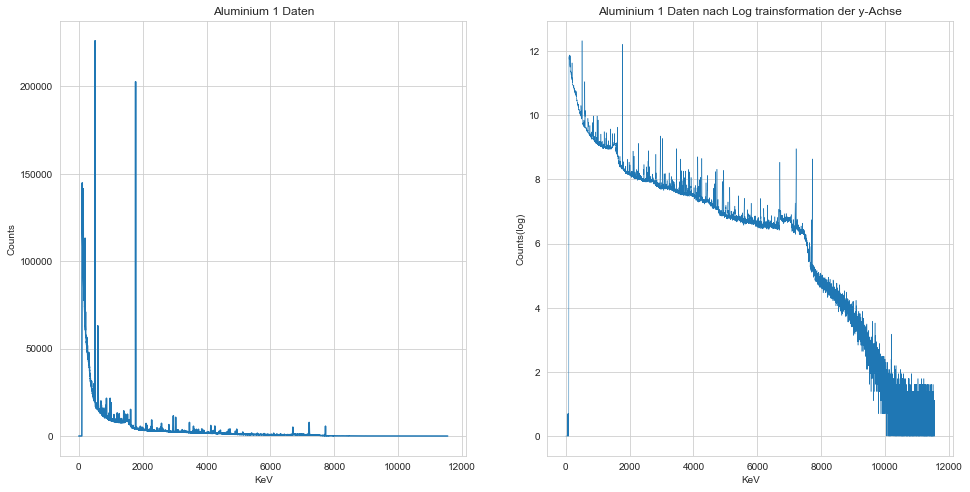

In [6]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(1,2, figsize=(16,8))

sns.lineplot(x='KeV', y='Counts', data=data, ax=ax[0])
ax[0].set_title("Aluminium 1 Daten")

sns.lineplot(x='KeV', y='Counts(log)', data=data, linewidth=0.5, ax=ax[1])
ax[1].set_title("Aluminium 1 Daten nach Log trainsformation der y-Achse")

fig.savefig("Vor_Nach_Log.png")
plt.show()

# Komplette Daten

In [7]:
data_complete = pd.read_csv('AIChallenge_Archive/materials.csv', header=1, skipinitialspace=True)
#data_complete.drop('channel', axis=1, inplace=True)
data_complete.head()

,channel,Al_1,Al_2,Al_3,Al_4,Al_5,Asilikos,Batterien,Cu_0,Cu_1,...,Cu_4,Cu_5,E-Schrott,Erdreich_1,Erdreich_2,Erz,Melamine,PVC,Stuckgips,Zement
0,1,114029.0,0.0,120460.0,139299.0,126009.0,129635.0,245381.0,9344.0,632245.0,...,668144.0,365089.0,502561.0,208509.0,214481.0,32772.0,0.0,74515.0,110722.0,510988.0
1,2,127755.0,0.0,133759.0,155997.0,140620.0,142635.0,244500.0,10683.0,633533.0,...,671510.0,365492.0,500074.0,208043.0,214120.0,36649.0,0.0,86027.0,109931.0,507617.0
2,3,131648.0,0.0,137743.0,160507.0,144329.0,146872.0,244015.0,10888.0,632122.0,...,672515.0,365888.0,499030.0,206711.0,213329.0,38136.0,0.0,88909.0,109100.0,505638.0
3,4,131825.0,0.0,138640.0,160614.0,144185.0,146709.0,242481.0,10956.0,633030.0,...,671945.0,365529.0,496066.0,204582.0,211625.0,38590.0,0.0,89854.0,108346.0,502495.0
4,5,131731.0,1.0,138780.0,160435.0,143687.0,145903.0,241698.0,10795.0,631888.0,...,670891.0,365304.0,492185.0,204442.0,209939.0,38478.0,0.0,90026.0,107251.0,498474.0


In [8]:
data_complete.describe()

,channel,Al_1,Al_2,Al_3,Al_4,Al_5,Asilikos,Batterien,Cu_0,Cu_1,...,Cu_4,Cu_5,E-Schrott,Erdreich_1,Erdreich_2,Erz,Melamine,PVC,Stuckgips,Zement
count,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000,1.624400e+04,16244.000000,1.624400e+04,...,1.624400e+04,1.624400e+04,1.624400e+04,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000,16244.000000
mean,8122.500000,3989.150148,3550.121276,4413.163137,4833.646577,4367.307252,4217.551157,1.076502e+04,427.994829,2.440776e+04,...,2.797738e+04,1.357693e+04,1.830476e+04,6053.641283,6105.570918,1217.118013,1756.346774,3746.033797,3368.751724,15920.301096
std,4689.383222,12169.360211,9557.469085,13498.429130,15227.884231,13353.692517,14112.856786,3.332587e+04,1509.220986,8.904986e+04,...,9.677262e+04,4.911376e+04,7.939961e+04,18765.601620,19338.212695,3639.269485,5290.465701,11429.911475,9620.202541,46470.838168
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,5.000000e+00,...,1.200000e+01,0.000000e+00,3.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,4061.750000,64.000000,59.000000,75.000000,67.000000,70.000000,84.000000,1.460000e+02,6.000000,2.360000e+02,...,3.590000e+02,1.350000e+02,4.637500e+02,385.000000,357.000000,93.000000,45.000000,23.000000,94.000000,446.000000
50%,8122.500000,864.000000,902.500000,972.000000,1074.000000,939.000000,864.000000,1.427500e+03,135.000000,6.849500e+03,...,8.699000e+03,3.616000e+03,4.013000e+03,1565.000000,1503.500000,387.000000,317.000000,1196.000000,913.500000,4902.500000
75%,12183.250000,2700.000000,2715.000000,2884.500000,3025.000000,2889.500000,2585.000000,8.086500e+03,262.250000,1.282325e+04,...,1.649725e+04,7.191750e+03,9.628000e+03,4090.250000,3963.500000,873.000000,1045.000000,2186.250000,2506.250000,11289.000000
max,16244.000000,226078.000000,215179.000000,260612.000000,275648.000000,246199.000000,202792.000000,1.192077e+06,40487.000000,2.104253e+06,...,2.299877e+06,1.154054e+06,1.866200e+06,378677.000000,396969.000000,78047.000000,117050.000000,271123.000000,172100.000000,769061.000000


In [9]:
#speichere die spaltennamen in eine liste
columns = data_complete.columns.tolist()

### Plotte Aluminium Daten

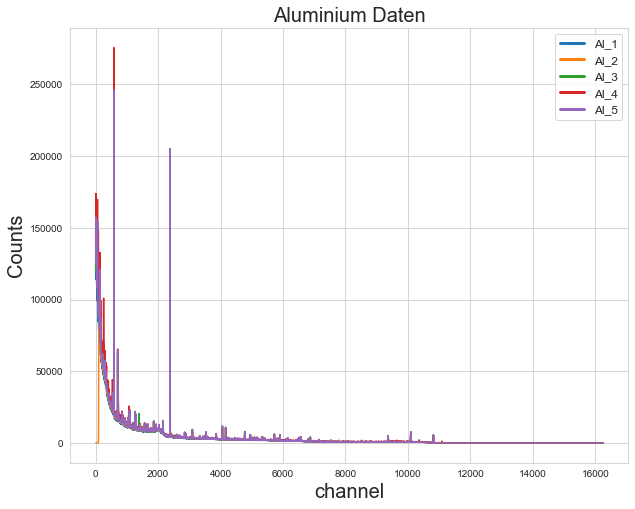

In [10]:
plt.figure(figsize=(10,8))

for column in columns[1:6]:
    sns.lineplot(
        data=data_complete, 
        x='channel', 
        y=column, 
    ).set_title("Aluminium Daten", 
                fontsize=20)

legend = plt.legend(labels=columns[1:6], fontsize = 12)
for line in legend.legendHandles:
    line.set_linewidth(3)

plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts", fontsize=20)

plt.show()

### Plotte alle Daten

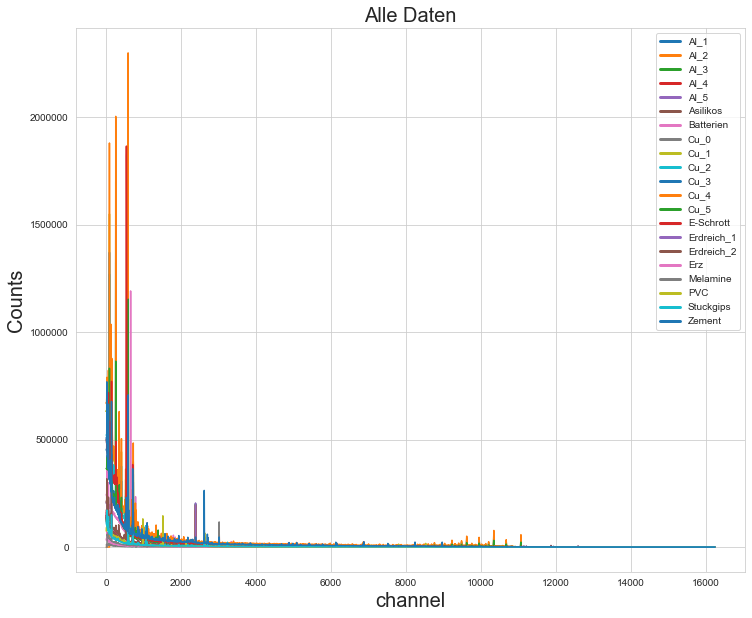

In [11]:
plt.figure(figsize=(12,10))

for column in columns[1:]:
    sns.lineplot(
        data=data_complete, 
        x='channel', 
        y=column,
    ).set_title("Alle Daten", fontsize=20)

legend = plt.legend(labels=columns[1:], fontsize = 10)
for line in legend.legendHandles:
    line.set_linewidth(3)

#Entferne scientific notation der y-Achse
plt.ticklabel_format(style='plain', axis='y',useOffset=False)

plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts", fontsize=20)
    
plt.show()

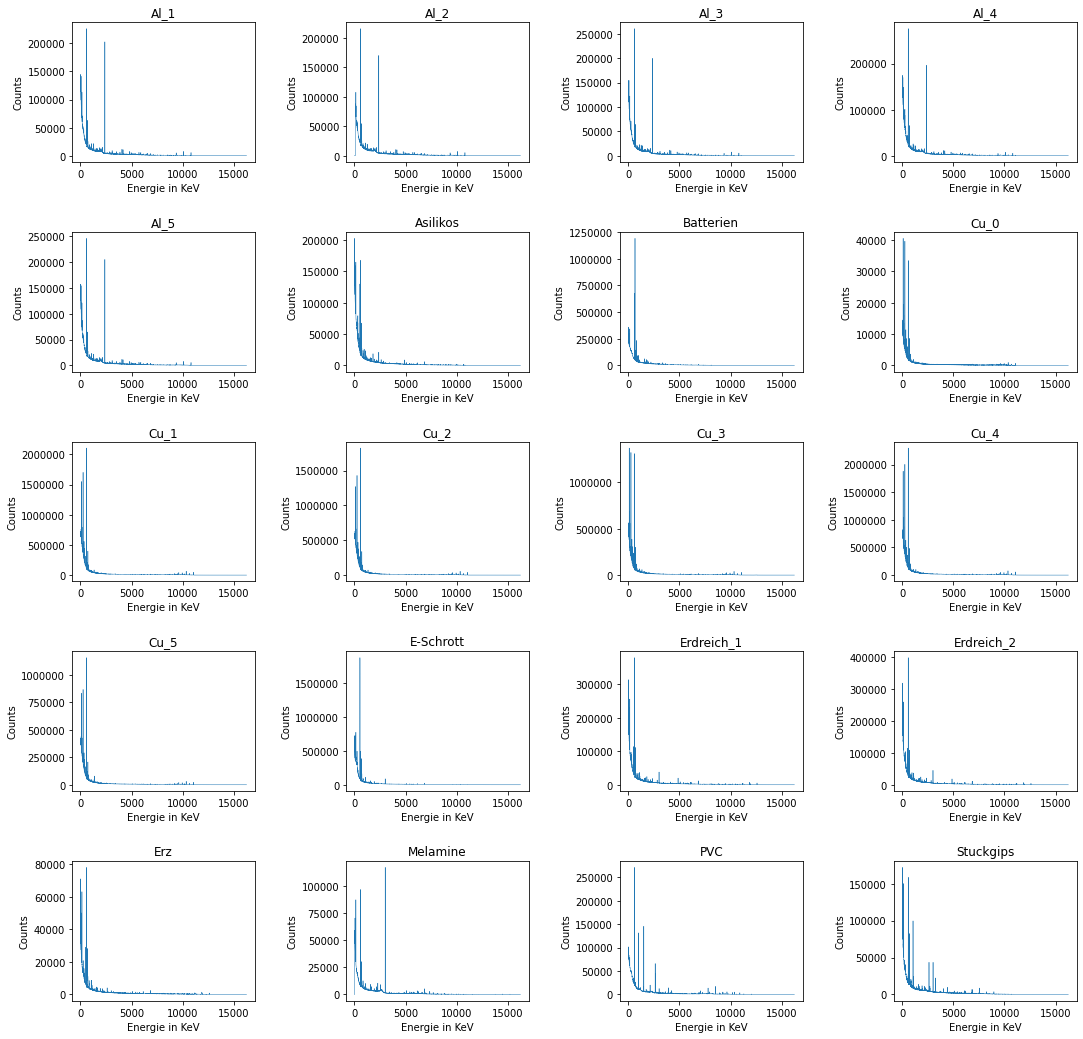

In [11]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
ax = ax.flatten()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(1, len(columns)-1):
    sns.lineplot(data=data_complete, x='channel', y=columns[i], ax=ax[i-1], linewidth=0.5)
    ax[i-1].set_title(columns[i])
    ax[i-1].set_xlabel("Energie in KeV")
    ax[i-1].set_ylabel("Counts")
    ax[i-1].ticklabel_format(style='plain', axis='y',useOffset=False)

plt.show()

### Rechne von jeder Spalte (außer channel) den Logarithmus aus

In [12]:
log_data = data_complete.copy()
columns = log_data.columns.tolist()

for column in columns[1:]:
    log_data[column] = np.log(log_data[column]+1)

log_data.replace({'0':np.nan, 0:np.nan}, inplace=True)

log_data.head()

,channel,Al_1,Al_2,Al_3,Al_4,Al_5,Asilikos,Batterien,Cu_0,Cu_1,...,Cu_4,Cu_5,E-Schrott,Erdreich_1,Erdreich_2,Erz,Melamine,PVC,Stuckgips,Zement
0,1,11.644217,NaN,11.699081,11.844385,11.744117,11.772486,12.410571,9.142597,13.357034,...,13.412260,12.807899,13.127474,12.247742,12.275981,10.397360,NaN,11.218769,11.614787,13.144103
1,2,11.757877,NaN,11.803802,11.957598,11.853824,11.868051,12.406975,9.276503,13.359069,...,13.417286,12.809002,13.122513,12.245505,12.274297,10.509169,NaN,11.362428,11.607617,13.137484
2,3,11.787895,NaN,11.833152,11.986099,11.879858,11.897324,12.404989,9.295508,13.356839,...,13.418781,12.810085,13.120423,12.239082,12.270596,10.548940,NaN,11.395380,11.600029,13.133578
3,4,11.789238,NaN,11.839643,11.986765,11.878859,11.896213,12.398683,9.301734,13.358275,...,13.417933,12.809104,13.114466,12.228729,12.262576,10.560774,NaN,11.405953,11.593094,13.127343
4,5,11.788525,0.693147,11.840652,11.985650,11.875400,11.890704,12.395448,9.286931,13.356469,...,13.416363,12.808488,13.106612,12.228044,12.254577,10.557868,NaN,11.407865,11.582936,13.119309


<Figure size 720x576 with 0 Axes>

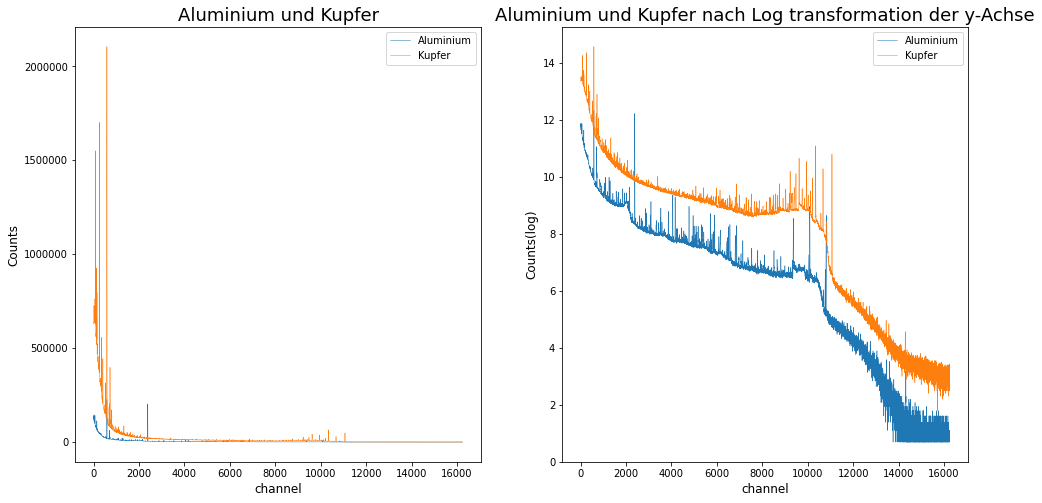

In [13]:
plt.figure(figsize=(10,8))
fig, ax = plt.subplots(1,2, figsize=(16,8))
cols = data_complete.columns.tolist()
#ax.flatten()

sns.lineplot(data=data_complete, x='channel', y='Al_1', linewidth=0.5, ax=ax[0], label='Aluminium')
sns.lineplot(data=data_complete, x='channel', y='Cu_1', linewidth=0.5, ax=ax[0], label='Kupfer')
ax[0].set_title("Aluminium und Kupfer", fontsize=18)

sns.lineplot(data=log_data, x='channel', y='Al_1', linewidth=0.5, ax=ax[1], label='Aluminium')
sns.lineplot(data=log_data, x='channel', y='Cu_1', linewidth=0.5, ax=ax[1], label='Kupfer')
ax[1].set_title("Aluminium und Kupfer nach Log transformation der y-Achse", fontsize=18)

ax[0].ticklabel_format(style='plain', axis='y',useOffset=False)

ax[0].set_xlabel("channel", fontsize=12)
ax[0].set_ylabel("Counts", fontsize=12)

ax[1].set_xlabel("channel", fontsize=12)
ax[1].set_ylabel("Counts(log)", fontsize=12)

fig.savefig("Aluminium_und_Kupfer.png")
plt.show()

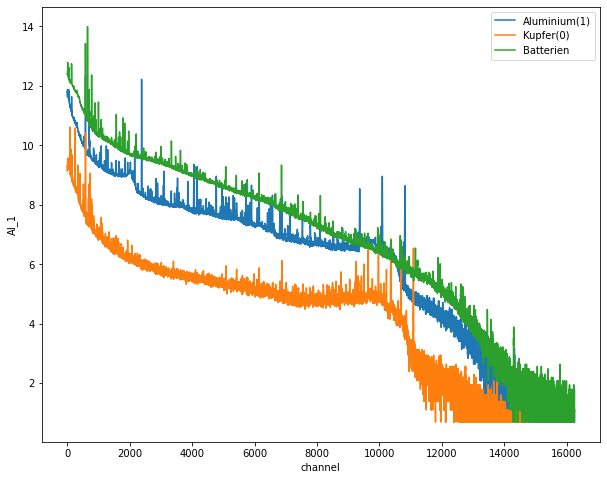

In [14]:
plt.figure(figsize=(10,8))
sns.lineplot(x=log_data['channel'], y=log_data['Al_1'], label='Aluminium(1)')
sns.lineplot(data=log_data, x='channel', y='Cu_0', label='Kupfer(0)')
sns.lineplot(data=log_data, x='channel', y='Batterien', label='Batterien')
plt.show()

In [15]:
log_data['Al_1']

0        11.644217
1        11.757877
2        11.787895
3        11.789238
4        11.788525
           ...    
16239          NaN
16240          NaN
16241          NaN
16242     1.098612
16243     1.098612
Name: Al_1, Length: 16244, dtype: float64

### Plot für alle 5 Aluminium Daten

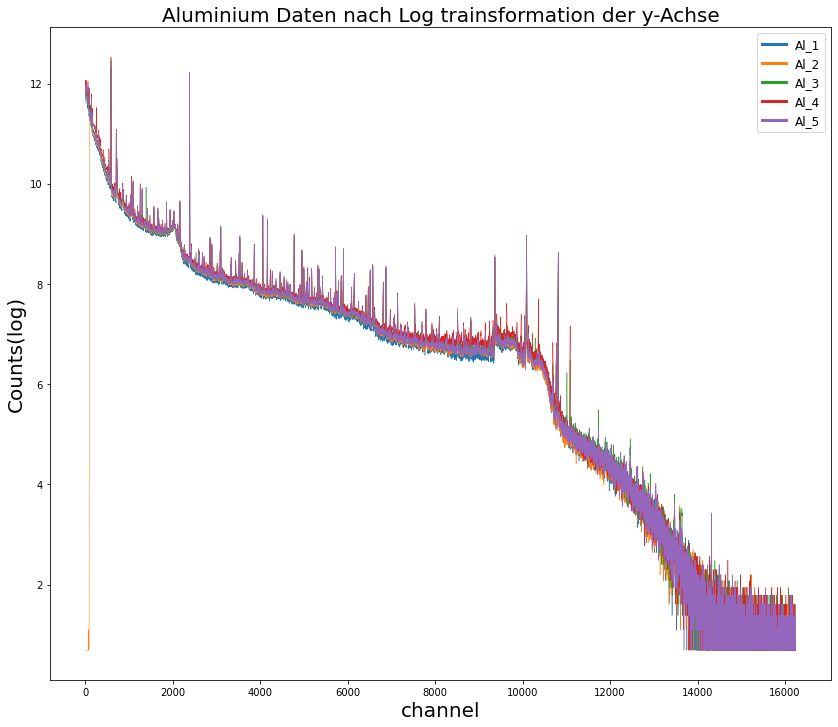

In [16]:
plt.figure(figsize=(14,12))

for column in columns[1:6]:
    g = sns.lineplot(
        data=log_data, 
        x='channel', 
        y=column, 
        linewidth=0.5,
    ).set_title("Aluminium Daten nach Log trainsformation der y-Achse", fontsize=20)

legend = plt.legend(labels=columns[1:6], fontsize = 12)
for line in legend.legendHandles:
    line.set_linewidth(3)
    
plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts(log)", fontsize=20)

plt.savefig("Aluminium.png")
plt.show()

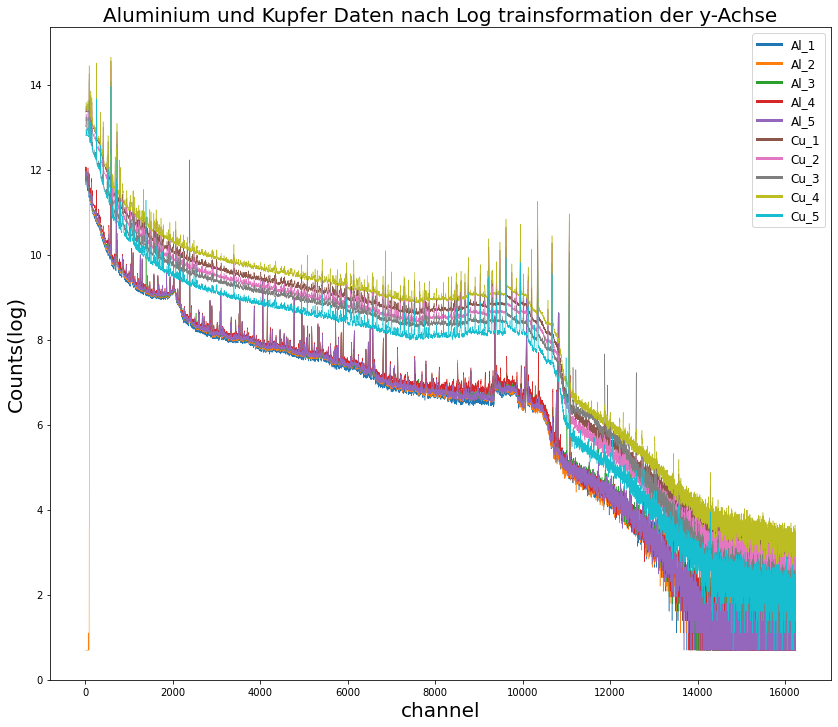

In [17]:
plt.figure(figsize=(14,12))

for column in columns[1:6]+columns[9:14]:
    g = sns.lineplot(
        data=log_data, 
        x='channel', 
        y=column, 
        linewidth=0.5,
    ).set_title("Aluminium und Kupfer Daten nach Log trainsformation der y-Achse", fontsize=20)

legend = plt.legend(labels=columns[1:6]+columns[9:14], fontsize = 12)
for line in legend.legendHandles:
    line.set_linewidth(3)
    
plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts(log)", fontsize=20)

plt.show()

In [18]:
# plt.figure(figsize=(14,12))

# sns.lineplot(data=log_data,  x='channel', y='Al_1', linewidth=0.5,)

# sns.lineplot(data=log_data,  x='channel', y='Cu_1', linewidth=0.5,)

# # legend = plt.legend(labels=columns[1:6], fontsize = 12)
# # for line in legend.legendHandles:
# #     line.set_linewidth(3)
    
# plt.xlabel("Energie in KeV", fontsize=20)
# plt.ylabel("Counts(log)", fontsize=20)

# plt.show()

### Plotte 5 zufällige spalten

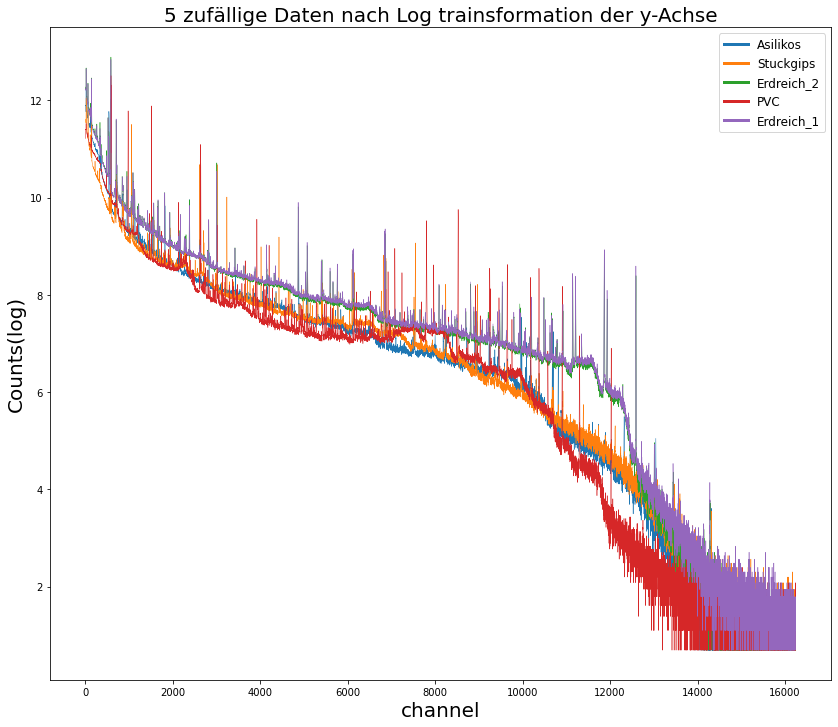

In [19]:
plt.figure(figsize=(14,12))

random_columns = rand.sample(columns[1:], 5)

for column in random_columns:
    sns.lineplot(
        data=log_data, 
        x='channel', 
        y=column, linewidth=0.5
    ).set_title("{} zufällige Daten nach Log trainsformation der y-Achse".format(len(random_columns)), 
                fontsize=20)

legend = plt.legend(labels=random_columns, fontsize = 12)
for line in legend.legendHandles:
    line.set_linewidth(3)
    
plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts(log)", fontsize=20)

plt.savefig("Fünf_Daten.png")
plt.show()

### Plotte alle spalten

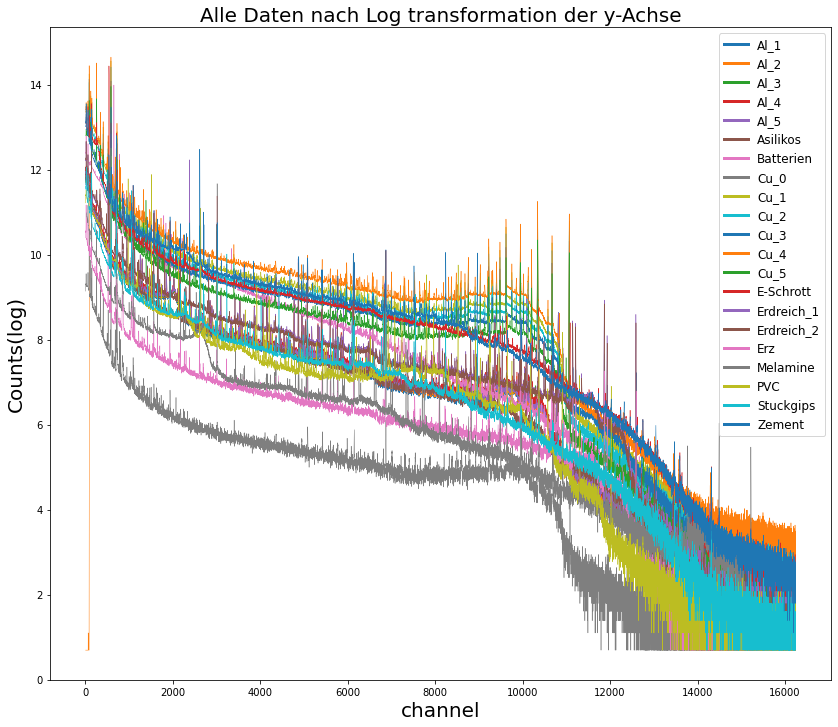

In [20]:
plt.figure(figsize=(14,12))

for column in columns[1:]:
    sns.lineplot(
        data=log_data, 
        x='channel', 
        y=column, 
        linewidth=0.5
    ).set_title("Alle Daten nach Log transformation der y-Achse", fontsize=20)

legend = plt.legend(labels=columns[1:], fontsize = 12)
for line in legend.legendHandles:
    line.set_linewidth(3)
    
plt.xlabel("channel", fontsize=20)
plt.ylabel("Counts(log)", fontsize=20)

plt.savefig("Alle_Daten_Plot.png")
plt.show()

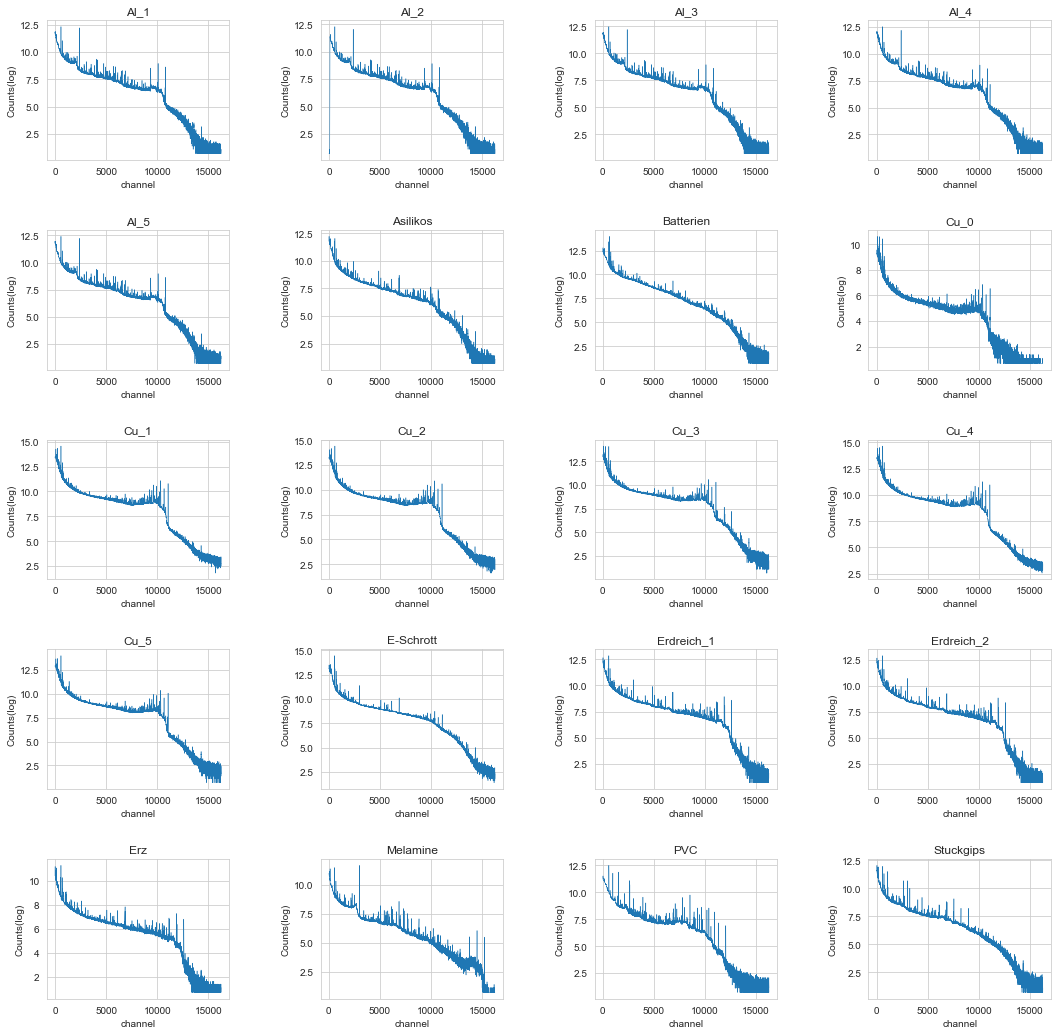

In [21]:
fig, ax = plt.subplots(5,4, figsize=(18,18))
ax = ax.flatten()
plt.subplots_adjust(wspace=0.5, hspace=0.5)

for i in range(1, len(columns)-1):
    sns.lineplot(data=log_data, x='channel', y=columns[i], ax=ax[i-1], linewidth=0.5)
    ax[i-1].set_title(columns[i])
    ax[i-1].set_xlabel("channel")
    ax[i-1].set_ylabel("Counts(log)")

plt.show()

In [24]:
help(noise_reduction)
log_data.head()

Help on function noise_reduction in module ipynb.fs.defs.Noise_reduction:

noise_reduction(df: pandas.core.frame.DataFrame, start: int, column: str, n: int = 5)
    need to import lfilter from scipy.signal
    Reduziert das Datenrauschen im übergebenen DataFrame vom gegebenen index bis zum ende des DF.
    
    Args:
        df: Pandas DataFrame
        start: Startindex als int Wert
        column: Die Spalte als String die bearbeitet werden soll
        n: 
        
    Returns:
        pandas DataFrame



,channel,Al_1,Al_2,Al_3,Al_4,Al_5,Asilikos,Batterien,Cu_0,Cu_1,...,Cu_4,Cu_5,E-Schrott,Erdreich_1,Erdreich_2,Erz,Melamine,PVC,Stuckgips,Zement
0,1,11.644217,NaN,11.699081,11.844385,11.744117,11.772486,12.410571,9.142597,13.357034,...,13.412260,12.807899,13.127474,12.247742,12.275981,10.397360,NaN,11.218769,11.614787,13.144103
1,2,11.757877,NaN,11.803802,11.957598,11.853824,11.868051,12.406975,9.276503,13.359069,...,13.417286,12.809002,13.122513,12.245505,12.274297,10.509169,NaN,11.362428,11.607617,13.137484
2,3,11.787895,NaN,11.833152,11.986099,11.879858,11.897324,12.404989,9.295508,13.356839,...,13.418781,12.810085,13.120423,12.239082,12.270596,10.548940,NaN,11.395380,11.600029,13.133578
3,4,11.789238,NaN,11.839643,11.986765,11.878859,11.896213,12.398683,9.301734,13.358275,...,13.417933,12.809104,13.114466,12.228729,12.262576,10.560774,NaN,11.405953,11.593094,13.127343
4,5,11.788525,0.693147,11.840652,11.985650,11.875400,11.890704,12.395448,9.286931,13.356469,...,13.416363,12.808488,13.106612,12.228044,12.254577,10.557868,NaN,11.407865,11.582936,13.119309


In [30]:
test = log_data.copy()
for column in test.columns[1:]:
    test[column] = noise_reduction(test, 13500, column, 3)

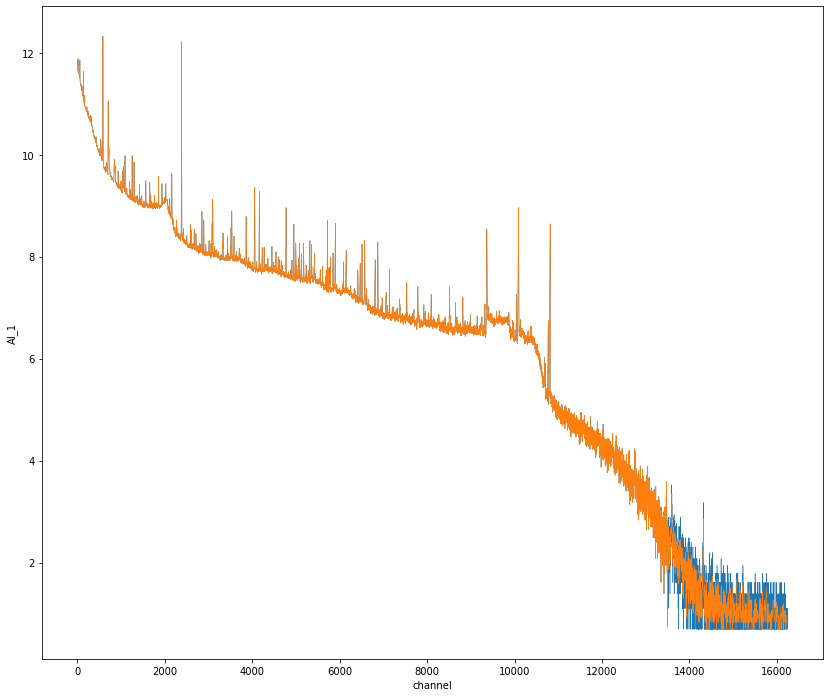

In [34]:
plt.figure(figsize=(14,12))
col = 'Al_1'
sns.lineplot(data=log_data, x='channel', y=col, linewidth=0.5)
sns.lineplot(data=test, x='channel', y=col, linewidth=0.5)
plt.show()